In [1]:
import os

In [2]:
!wget ftp://ftp.microbio.me/pub/qiime-files/qiime_overview_tutorial.zip

--2017-09-07 06:44:05--  ftp://ftp.microbio.me/pub/qiime-files/qiime_overview_tutorial.zip
           => ‘qiime_overview_tutorial.zip’
Resolving ftp.microbio.me (ftp.microbio.me)... 169.228.46.98
Connecting to ftp.microbio.me (ftp.microbio.me)|169.228.46.98|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/qiime-files ... done.
==> SIZE qiime_overview_tutorial.zip ... 2002699
==> PASV ... done.    ==> RETR qiime_overview_tutorial.zip ... done.
Length: 2002699 (1.9M) (unauthoritative)

qiime_overview_tuto 100%[=====================>]   1.91M   827KB/s   in 2.4s   

2017-09-07 06:44:09 (827 KB/s) - ‘qiime_overview_tutorial.zip’ saved [2002699]



In [5]:
!unzip qiime_overview_tutorial.zip

Archive:  qiime_overview_tutorial.zip
   creating: qiime_overview_tutorial/
  inflating: qiime_overview_tutorial/Fasting_Example.fna  
   creating: qiime_overview_tutorial/18S_tutorial_files/
  inflating: qiime_overview_tutorial/18S_tutorial_files/18S_tutorial_sample_seqs.fna  
  inflating: qiime_overview_tutorial/Fasting_Example.qual  
  inflating: qiime_overview_tutorial/README  
  inflating: qiime_overview_tutorial/Fasting_Map.txt  
  inflating: qiime_overview_tutorial/Fasting_Example.sff  
  inflating: qiime_overview_tutorial/Fasting_Example.sff.txt  


In [6]:
cd qiime_overview_tutorial/

/root/qiime_overview_tutorial


In [8]:
ls

18S_tutorial_files/  Fasting_Example.qual  Fasting_Example.sff.txt  README
Fasting_Example.fna  Fasting_Example.sff   Fasting_Map.txt


In [7]:
!validate_mapping_file.py -m Fasting_Map.txt -o mapping_output

/bin/sh: 1: validate_mapping_file.py: not found


## As can be seen in the previous cells, qiime2 no longer uses the same script based processing.

In [20]:
!split_libraries.py -m Fasting_Map.txt -f Fasting_Example.fna -q Fasting_Example.qual -o split_library_output

In [21]:
!cat split_library_output/histograms.txt

# bins raw sequence lengths, length of sequences that pass quality filters before processing, and lengths of sequences that pass quality filters post processing.
Length	Raw	Before	After
200	0	0	25
210	0	0	123
220	0	0	278
230	10	10	579
240	102	102	288
250	258	258	43
260	453	451	1
270	379	379	0
280	133	133	0
290	4	4	0

In [31]:
!pick_de_novo_otus.py -i split_library_output/seqs.fna -o otusa

In [36]:
!sumtrees.py otusa/rep_set.tre

/==========================================================================\
|                                 SumTrees                                 |
|                     Phylogenetic Tree Summarization                      |
|                              Version 4.2.0                               |
|                   By Jeet Sukumaran and Mark T. Holder                   |
|                          Using: DendroPy 4.2.0                           |
+--------------------------------------------------------------------------+
|                                 Citation                                 |
|                                 ~~~~~~~~                                 |
| If any stage of your work or analyses relies on code or programs from    |
| this library, either directly or indirectly (e.g., through usage of your |
| own or third-party programs, pipelines, or toolkits which use, rely on,  |
| incorporate, or are otherwise primarily derivative of code/programs in   |

In [34]:
!biom summarize-table -i otusa/otu_table.biom

Num samples: 9
Num observations: 419
Total count: 1337
Table density (fraction of non-zero values): 0.168

Counts/sample summary:
 Min: 146.0
 Max: 150.0
 Median: 149.000
 Mean: 148.556
 Std. dev.: 1.257
 Sample Metadata Categories: None provided
 Observation Metadata Categories: taxonomy

Counts/sample detail:
PC.481: 146.0
PC.355: 147.0
PC.636: 148.0
PC.607: 149.0
PC.635: 149.0
PC.593: 149.0
PC.354: 149.0
PC.634: 150.0
PC.356: 150.0


In [50]:
!make_otu_network.py -m Fasting_Map.txt -i otusa/otu_table.biom -o otus

In [63]:
import networkx as nx
G = nx.Graph()

In [64]:
!cat otus/otu_network/real_node_table.txt

node_name	node_disp_name	ntype	degree	weighted_degree	consensus_lin	BarcodeSequence	LinkerPrimerSequence	Treatment	DOB
PC.354	PC.354	user_node	64	149.0	other	AGCACGAGCCTA	YATGCTGCCTCCCGTAGGAGT	Control	20061218
PC.355	PC.355	user_node	62	147.0	other	AACTCGTCGATG	YATGCTGCCTCCCGTAGGAGT	Control	20061218
PC.356	PC.356	user_node	83	150.0	other	ACAGACCACTCA	YATGCTGCCTCCCGTAGGAGT	Control	20061126
PC.481	PC.481	user_node	80	146.0	other	ACCAGCGACTAG	YATGCTGCCTCCCGTAGGAGT	Control	20070314
PC.593	PC.593	user_node	48	149.0	other	AGCAGCACTTGT	YATGCTGCCTCCCGTAGGAGT	Control	20071210
PC.607	PC.607	user_node	79	149.0	other	AACTGTGCGTAC	YATGCTGCCTCCCGTAGGAGT	Fast	20071112
PC.634	PC.634	user_node	64	150.0	other	ACAGAGTCGGCT	YATGCTGCCTCCCGTAGGAGT	Fast	20080116
PC.635	PC.635	user_node	91	149.0	other	ACCGCAGAGTCA	YATGCTGCCTCCCGTAGGAGT	Fast	20080116
PC.636	PC.636	user_node	63	148.0	other	ACGGTGAGTGTC	YATGCTGCCTCCCGTAGGAGT	Fast	20080116
denovo0		otu_node	1	1.0	k__Bacteria:p__Firmicutes:c__Bacilli:o__Bacillales

In [65]:
!summarize_taxa_through_plots.py -i otusa/otu_table.biom -o taxa_summary -m Fasting_Map.txt

/opt/conda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [67]:
!cat taxa_summary/otu_table_L3.txt

# Constructed from biom file
#OTU ID	PC.636	PC.635	PC.356	PC.481	PC.354	PC.593	PC.355	PC.607	PC.634
Unassigned;Other;Other	0.027027027027	0.00671140939597	0.0133333333333	0.00684931506849	0.0	0.00671140939597	0.00680272108844	0.0134228187919	0.02
k__Bacteria;Other;Other	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.00671140939597	0.0
k__Bacteria;p__Actinobacteria;c__Coriobacteriia	0.00675675675676	0.0	0.0	0.00684931506849	0.0	0.0	0.0	0.0134228187919	0.0133333333333
k__Bacteria;p__Bacteroidetes;c__Bacteroidia	0.675675675676	0.530201342282	0.2	0.143835616438	0.0805369127517	0.389261744966	0.285714285714	0.288590604027	0.64
k__Bacteria;p__Deferribacteres;c__Deferribacteres	0.0472972972973	0.0134228187919	0.0	0.0	0.0	0.0	0.0	0.0201342281879	0.0333333333333
k__Bacteria;p__Firmicutes;c__Bacilli	0.027027027027	0.0	0.0933333333333	0.0890410958904	0.107382550336	0.0335570469799	0.0136054421769	0.00671140939597	0.02
k__Bacteria;p__Firmicutes;c__Clostridia	0.195945945946	0.436241610738	0.686666666667	0.712328767

In [71]:
cd ../

/home/jovyan/work/qiime_overview_tutorial/taxa_summary/taxa_summary_plots


In [72]:
ls

area_charts.html  bar_charts.html  charts/  css/  js/  raw_data/


In [84]:
from IPython.display import HTML
HTML('/home/jovyan/area_charts.html')

In [85]:
HTML('/home/jovyan/bar_charts.html')

In [103]:
!make_otu_heatmap.py -i taxa_summary/otu_table_L3.biom -o taxa_summary/otu_table_L3_heatmap.pdf -c Treatment -m Fasting_Map.txt

/opt/conda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [126]:
plt.rcParams['figure.figsize'] = (18, 12)

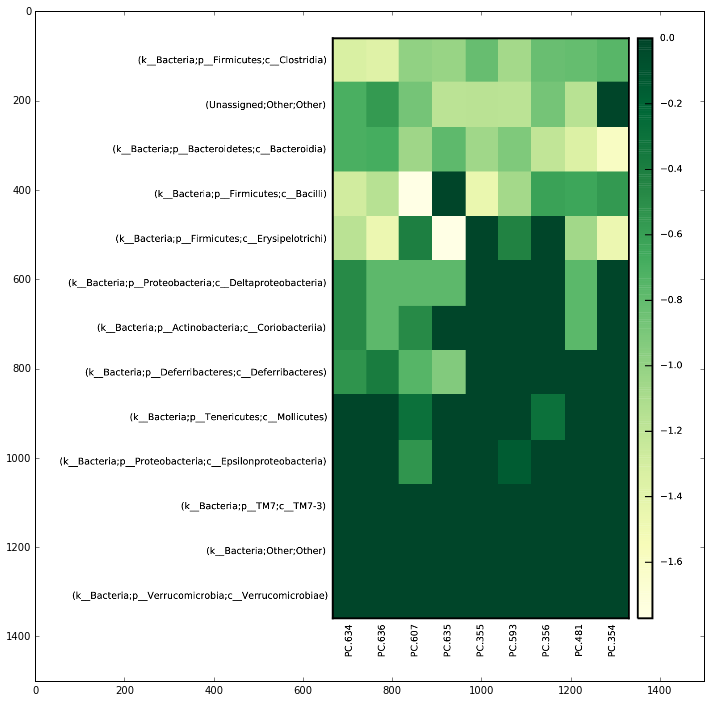

In [127]:
from matplotlib import pyplot as plt
img = plt.imread('taxa_summary/heatmap.png')
plt.imshow(img)

In [129]:
ls

18S_tutorial_files/   Fasting_Example.sff.txt  otus/     split_library_log.txt
Fasting_Example.fna   Fasting_Map.txt          otusa/    split_library_output/
Fasting_Example.qual  histograms.txt           README    taxa_summary/
Fasting_Example.sff   mapping_output/          seqs.fna


In [130]:
!alpha_rarefaction.py -i otusa/otu_table.biom -m Fasting_Map.txt -o arare -p alpha_params.txt -t otusa/rep_set.tre

/opt/conda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [132]:
!beta_diversity_through_plots.py -i otusa/otu_table.biom -m Fasting_Map.txt -o bdiv_even146 -t otusa/rep_set.tre -e 146

In [133]:
!jackknifed_beta_diversity.py -i otusa/otu_table.biom -t otusa/rep_set.tre -m Fasting_Map.txt -o jack -e 110